<a href="https://colab.research.google.com/github/OlgaRv/Lesson_INT_AD/blob/main/Lesson_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

С помощью этих данных на сегодняшнем уроке проведем анализ:
установим за какой период у нас есть дата о платежах;
узнаем сколько уникальных клиентов/категорий/методов оплаты/статусов у нас есть;
подсчитаем средний чек клиента;
посмотрим распределение по статусам — сколько заказов у нас отменено, сколько завершено, сколько возвращено);
изучим динамику продаж в виде таблицы и в виде графика;
рассмотрим продажи по дням недели в виде графика;
посмотрим GMV по каждой категории, так как нужно узнать, какая категория товара приносит больше всего денег;
узнаем долю отмен в каждой категории;
посмотрим на какие категории мы даем скидки;
составим рейтинг самых продаваемых товаров.

# Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/zerocoder/marketplace_dataframe.csv")

## Предобработка данных

In [ ]:
#  Удаление столбца 'Unnamed: 0', если он не нужен
df = df.drop(columns=['Unnamed: 0'])
# Преобразование столбцов к нужным типам данных
df['Дата создания'] = pd.to_datetime(df['Дата создания'], format="%d.%m.%Y")
df['Дата оплаты'] = pd.to_datetime(df['Дата оплаты'], format="%d.%m.%Y", errors='coerce')
# Удаление строк с пропущенными значениями
df.dropna()

,Unnamed: 0,ID товара,Статус,Дата создания,Артикул товара,Цена,Количество заказов,Итоговая сумма,ID транзакции,Категория,Сумма скидки,Метод оплаты,Дата оплаты,Дата начала обслуживания клиента,ID клиента
0,0,211131,завершен,01.07.2021,kreations_YI 06-L,1950,1,1950,100147443,Женская мода,0,наложенный платеж,01.07.2021,2021-7,1e4f1
1,1,211133,отменен,01.07.2021,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240,1,240,100147444,Красота и уход,0,наложенный платеж,01.07.2021,2021-7,1e4f2
2,2,211134,отменен,01.07.2021,Ego_UP0017-999-MR0,2450,1,2450,100147445,Женская мода,0,наложенный платеж,01.07.2021,2021-7,1e4f3
3,3,211135,завершен,01.07.2021,kcc_krone deal,360,1,60,100147446,Красота и уход,300,наложенный платеж,01.07.2021,2021-7,1e4f4
4,4,211136,заказ возвращен,01.07.2021,BK7010400AG,555,2,1110,100147447,Традиционные подарки,0,наложенный платеж,01.07.2021,2021-7,1e4f5


## Период даты платежей

In [ ]:

min_date = df['Дата создания'].min()
max_date = df['Дата создания'].max()
print(f"Период даты платежей: от {min_date} до {max_date}")

Период даты платежей: от 2021-07-01 00:00:00 до 2022-01-12 00:00:00


## Уникальные значения

In [ ]:

unique_clients = df['ID клиента'].nunique()
unique_categories = df['Категория'].nunique()
unique_payment_methods = df['Метод оплаты'].nunique()
unique_statuses = df['Статус'].nunique()
print(f"Уникальные клиенты: {unique_clients}")
print(f"Уникальные категории: {unique_categories}")
print(f"Уникальные методы оплаты: {unique_payment_methods}")
print(f"Уникальные статусы: {unique_statuses}")

Уникальные клиенты: 30952
Уникальные категории: 16
Уникальные методы оплаты: 10
Уникальные статусы: 9


In [ ]:
df['Метод оплаты'].unique()


array(['наложенный платеж', 'кредитная карта UBL', 'дебетовая карта Raif',
       'клиентский кредит', nan, 'мобильный банкинг MCB',
       'маркетинговые расходы', 'наличные при доставке',
       'товарный кредит', 'платежная система Payaxis', 'ваучер'],
      dtype=object)

In [ ]:
df['Статус'].unique()

array(['завершен', 'отменен', 'заказ возвращен', 'получен',
       'оформлен возврат', 'закрыт', 'мошенничество', 'на удержании',
       'обмен'], dtype=object)

In [ ]:
marketing_expenses = df[df['Метод оплаты'] == 'маркетинговые расходы']
marketing_expenses.describe()

,ID товара,Дата создания,Цена,Количество заказов,Итоговая сумма,ID транзакции,Дата оплаты
count,512.000000,512,512.000000,512.000000,512.000000,5.120000e+02,512
mean,243713.140625,2021-09-10 16:38:26.249999872,7139.730469,1.171875,14599.833984,1.001696e+08,2021-09-10 16:38:26.249999872
min,211486.000000,2021-07-01 00:00:00,1.000000,1.000000,1.000000,1.001477e+08,2021-07-01 00:00:00
25%,221762.500000,2021-08-01 18:00:00,415.000000,1.000000,706.000000,1.001552e+08,2021-08-01 18:00:00
50%,240837.500000,2021-09-13 12:00:00,1330.000000,1.000000,2558.000000,1.001674e+08,2021-09-13 12:00:00
75%,262767.250000,2021-10-13 12:00:00,5040.000000,1.000000,10280.000000,1.001829e+08,2021-10-13 12:00:00
max,295937.000000,2021-11-21 00:00:00,235000.000000,6.000000,535400.000000,1.002043e+08,2021-11-21 00:00:00
std,22352.976391,NaN,20549.015293,0.604735,50581.061905,1.516797e+04,NaN


In [ ]:
t_df = df[df['Метод оплаты'] == 'наложенный платеж']
t_df.describe()

,ID товара,Дата создания,Цена,Количество заказов,Итоговая сумма,ID транзакции,Дата оплаты
count,80369.000000,80369,80369.000000,80369.000000,80369.000000,8.036900e+04,80369
mean,291569.023405,2021-10-22 10:09:24.307133440,2394.808770,1.119486,3100.402618,1.002005e+08,2021-10-22 10:09:24.307133440
min,211131.000000,2021-07-01 00:00:00,0.000000,1.000000,0.000000,1.000013e+08,2021-07-01 00:00:00
25%,240420.000000,2021-09-11 00:00:00,260.000000,1.000000,330.000000,1.001672e+08,2021-09-11 00:00:00
50%,279669.000000,2021-11-14 00:00:00,495.000000,1.000000,750.000000,1.001939e+08,2021-11-14 00:00:00
75%,346387.000000,2021-11-26 00:00:00,1100.000000,1.000000,1949.000000,1.002360e+08,2021-11-26 00:00:00
max,387679.000000,2022-01-12 00:00:00,132000.000000,130.000000,111899.000000,1.002605e+08,2022-01-12 00:00:00
std,55192.246629,NaN,7359.319266,1.274440,8300.699623,3.534634e+04,NaN


## Средний чек клиента

In [ ]:
# вариант Нейрокота
average_order_value = df.groupby('ID клиента')['Итоговая сумма'].mean()
print(f"Средний чек клиента: {average_order_value.mean()}")

Средний чек клиента: 5044.424994461781


In [ ]:
# вариант chatGPT
average_value = df['Итоговая сумма'].mean()
print(f"Средний чек клиента: {average_value:.2f}")

Средний чек клиента: 5181.28


## Распределение по статусам

In [ ]:

status_distribution = df['Статус'].value_counts()
print("Распределение по статусам:")
print(status_distribution)

Распределение по статусам:
Статус
завершен            77810
отменен             41190
заказ возвращен     14732
получен              3059
оформлен возврат     2980
закрыт                213
мошенничество           7
на удержании            6
обмен                   4
Name: count, dtype: int64


## Динамика продаж

Динамика продаж:
Дата создания
2021-07-01      900364
2021-07-02     1374269
2021-07-03     2205826
2021-07-04     1094080
2021-07-05      388951
                ...   
2022-01-08     3805495
2022-01-09     7498592
2022-01-10     5114376
2022-01-11    12931450
2022-01-12     3746533
Name: Итоговая сумма, Length: 194, dtype: int64


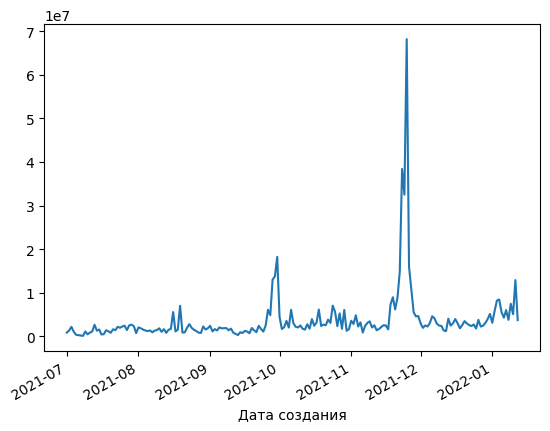

In [ ]:

sales_dynamics = df.groupby('Дата создания')['Итоговая сумма'].sum()
print("Динамика продаж:")
print(sales_dynamics)

sales_dynamics.plot()
plt.show()

## Визуализация распределения по статусам

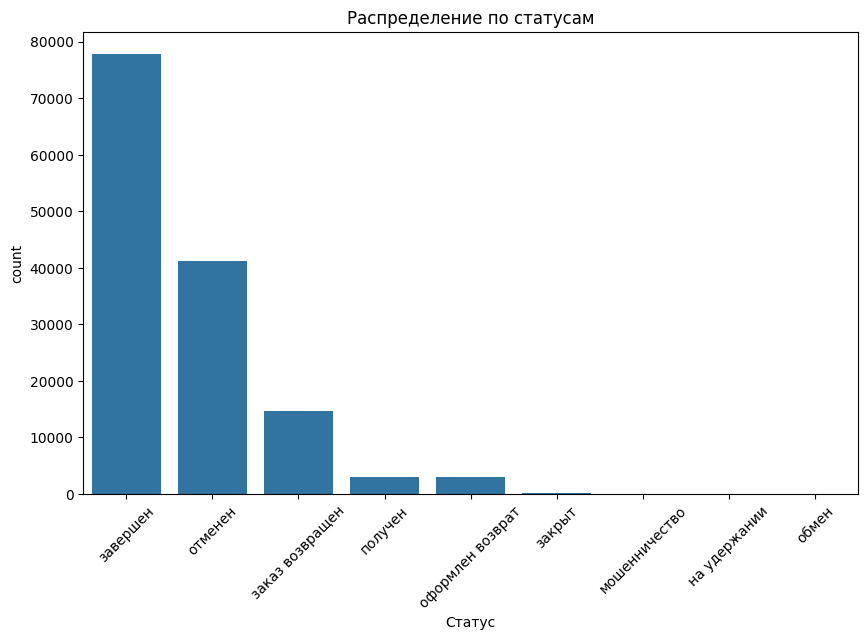

In [ ]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Статус')
plt.xticks(rotation=45)
plt.title("Распределение по статусам")
plt.show()

## Продажи по дням недели

Продажи по дням недели:
День недели
Friday        89546040
Monday       100893638
Saturday      60142543
Sunday        85496805
Thursday     150570122
Tuesday      124259922
Wednesday    114474805
Name: Итоговая сумма, dtype: int64


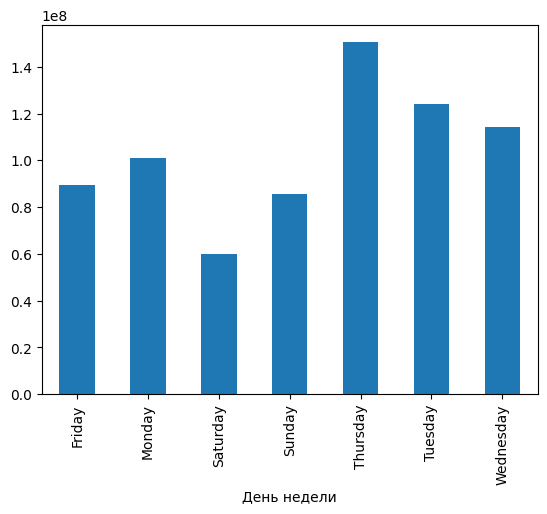

In [ ]:

df['День недели'] = df['Дата создания'].dt.day_name()
sales_by_day = df.groupby('День недели')['Итоговая сумма'].sum()
print("Продажи по дням недели:")
print(sales_by_day)

sales_by_day.plot(kind='bar')
plt.show()

## GMV по категориям

In [12]:

gmv_by_category = df.groupby('Категория')['Итоговая сумма'].sum()
print("GMV по категориям:")
print(gmv_by_category)

GMV по категориям:
Категория
\N                                36772543
Бытовая техника                   97934753
Гипермаркет                       10971331
Дети и младенцы                    8749241
Дом и быт                         20283158
Другое                             5199769
Женская мода                      36405325
Здоровье и спорт                   9896442
Книги                               644076
Компьютерная техника              43589022
Красота и уход                    19791713
Мобильные телефоны и планшеты    304605402
Мужская мода                      42339728
Развлечения                       71215832
Традиционные подарки              15293512
Школа и образование                1692028
Name: Итоговая сумма, dtype: int64


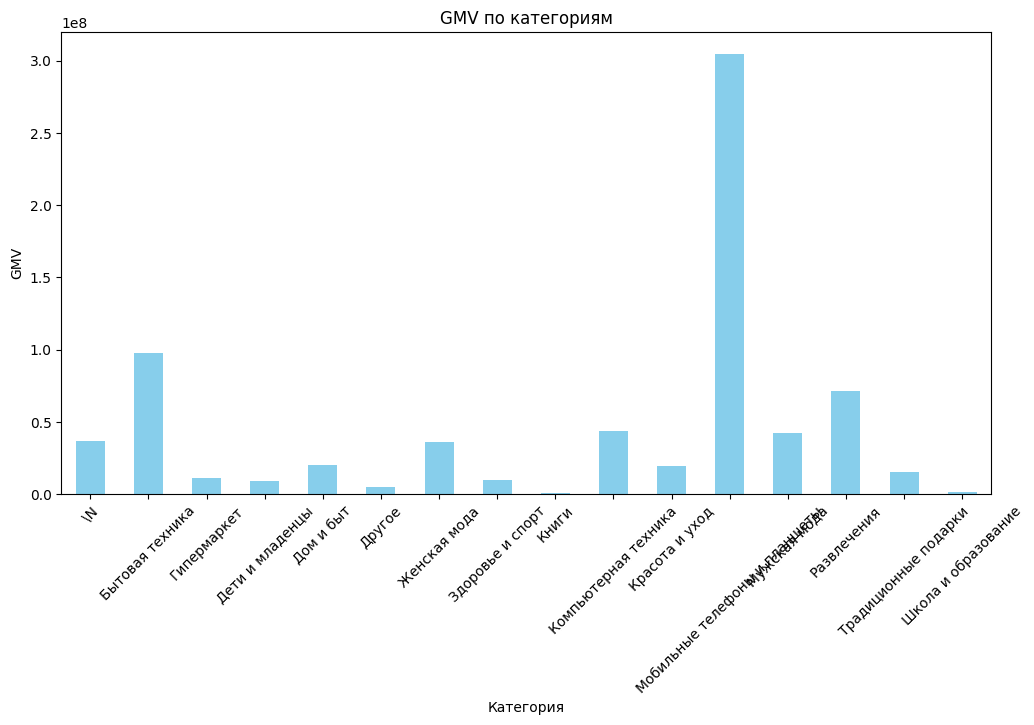

In [13]:
# Визуализация
plt.figure(figsize=(12,6))
gmv_by_category.plot(kind='bar', color='skyblue')
plt.title('GMV по категориям')
plt.xlabel('Категория')
plt.ylabel('GMV')
plt.xticks(rotation=45)
plt.show()


## Доля отмен в каждой категории

In [15]:

cancelled_orders = df[df['Статус'] == 'отменен']
cancelled_by_category = cancelled_orders.groupby('Категория').size() / df.groupby('Категория').size()
print("Доля отмен в каждой категории:")
print(cancelled_by_category)

Доля отмен в каждой категории:
Категория
\N                               0.383206
Бытовая техника                  0.416276
Гипермаркет                      0.302626
Дети и младенцы                  0.181940
Дом и быт                        0.306903
Другое                           0.414147
Женская мода                     0.268658
Здоровье и спорт                 0.215196
Книги                            0.116592
Компьютерная техника             0.444076
Красота и уход                   0.190896
Мобильные телефоны и планшеты    0.450209
Мужская мода                     0.180209
Развлечения                      0.582343
Традиционные подарки             0.187360
Школа и образование              0.173980
dtype: float64


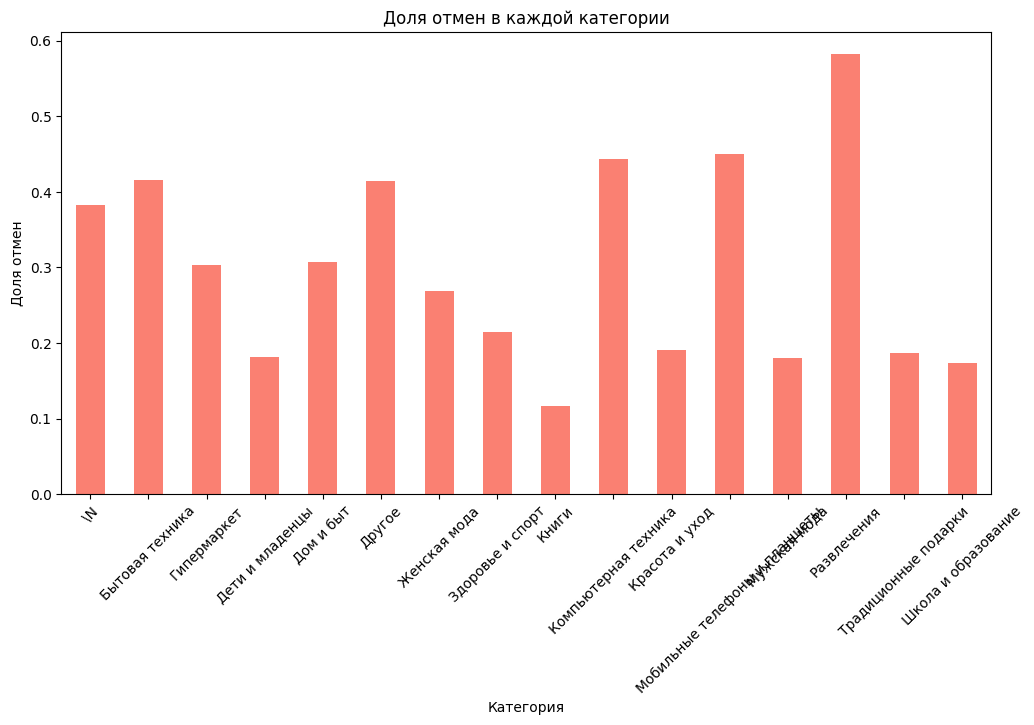

In [16]:
# Визуализация по статусу "отменен"
plt.figure(figsize=(12,6))
cancelled_by_category.plot(kind='bar', color='salmon')
plt.title('Доля отмен в каждой категории')
plt.xlabel('Категория')
plt.ylabel('Доля отмен')
plt.xticks(rotation=45)
plt.show()

## Категории со скидками

In [21]:
df['Сумма скидки'] = pd.to_numeric(df['Сумма скидки'], errors='coerce')

In [22]:

discounted_categories = df[df['Сумма скидки'] > 0]['Категория'].unique()
print("Категории со скидками:")
print(discounted_categories)

Категории со скидками:
['Красота и уход' 'Мужская мода' 'Традиционные подарки' 'Дети и младенцы'
 'Дом и быт' '\\N' 'Здоровье и спорт' 'Компьютерная техника'
 'Мобильные телефоны и планшеты' 'Женская мода' 'Школа и образование'
 'Бытовая техника' 'Гипермаркет' 'Развлечения' 'Другое']


## Группировка данных по категориям и суммирование скидок

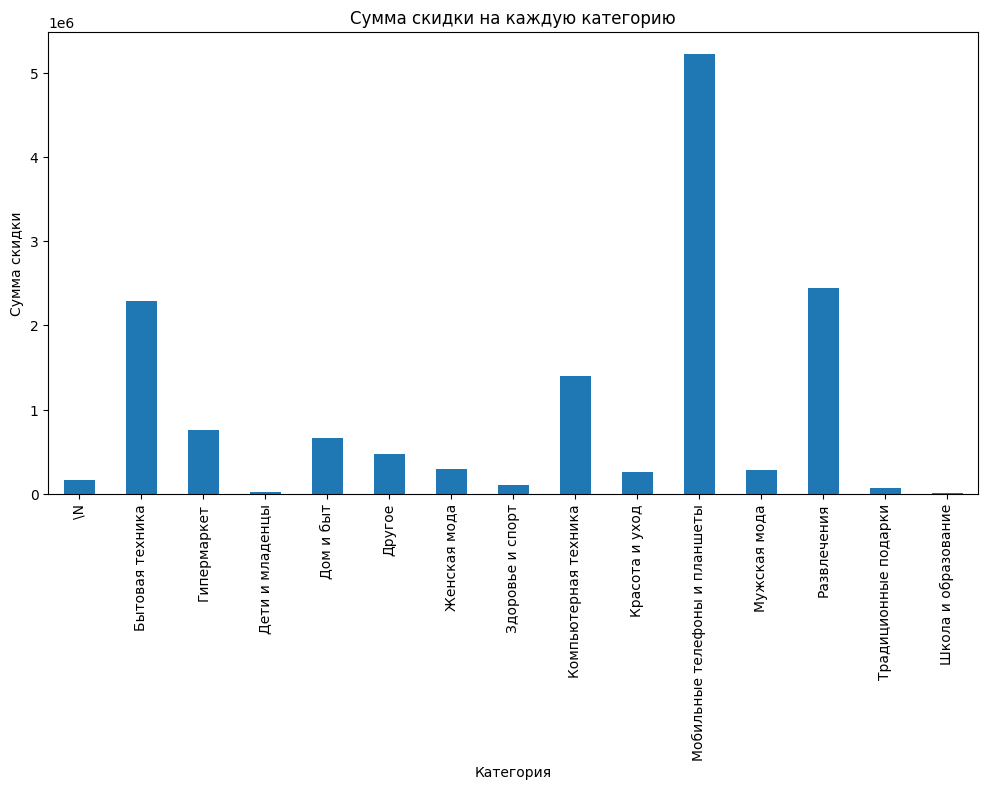

In [23]:

discounted_categories_sum = df[df['Сумма скидки'] > 0].groupby('Категория')['Сумма скидки'].sum()

# Построение гистограммы
plt.figure(figsize=(12, 6))
discounted_categories_sum.plot(kind='bar')
plt.title('Сумма скидки на каждую категорию')
plt.xlabel('Категория')
plt.ylabel('Сумма скидки')
plt.show()

## Рейтинг самых продаваемых товаров

In [28]:

best_selling_products = df.groupby('Артикул товара')['Количество заказов'].sum().sort_values(ascending=False)
print("Рейтинг самых продаваемых товаров:")
print(best_selling_products.head(10))

Рейтинг самых продаваемых товаров:
Артикул товара
Al Muhafiz Sohan Halwa Almond                 2397
emart_00-7                                    1696
kcc_krone deal                                1611
emart_00-1                                    1540
RS_Plain Rusk                                 1335
RB_Household Bundle                           1293
shahi_buy one get one free Shahi Dal Moong    1268
unilever_Deal-6                               1208
Rubian_U8 Smart Watch                          897
Telemall_MM-DR-HB-L                            892
Name: Количество заказов, dtype: int64


In [33]:
# вариант chatGPT
# преобразование столбца к нужным типам данных (если необходимо)
df['Количество заказов'] = pd.to_numeric(df['Количество заказов'], errors='coerce')
df['Артикул товара'] = df['Артикул товара'].astype(str)
df['Категория'] = df['Категория'].astype(str)

# Составляем рейтинг самых продаваемых товаров с категорией^
top_products = df.groupby(['Артикул товара', 'Категория']).agg({'Количество заказов': 'sum'}).reset_index()
top_products = top_products.sort_values(by='Количество заказов', ascending=False).reset_index(drop=True)
# Отображение топ- самых продаваемых товаров с категорией
top_products.head(10)


,Артикул товара,Категория,Количество заказов
0,Al Muhafiz Sohan Halwa Almond,Традиционные подарки,2397
1,emart_00-7,Дом и быт,1696
2,kcc_krone deal,Красота и уход,1611
3,emart_00-1,\N,1535
4,RS_Plain Rusk,Традиционные подарки,1335
5,RB_Household Bundle,Гипермаркет,1293
6,shahi_buy one get one free Shahi Dal Moong,Традиционные подарки,1268
7,unilever_Deal-6,Гипермаркет,1208
8,Rubian_U8 Smart Watch,Мобильные телефоны и планшеты,897
9,Telemall_MM-DR-HB-L,\N,892


from matplotlib import pyplot as plt
_df_0['Количество заказов'].plot(kind='hist', bins=20, title='Количество заказов')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Категория').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Количество заказов'].plot(kind='line', figsize=(8, 4), title='Количество заказов')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Категория'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Количество заказов', y='Категория', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

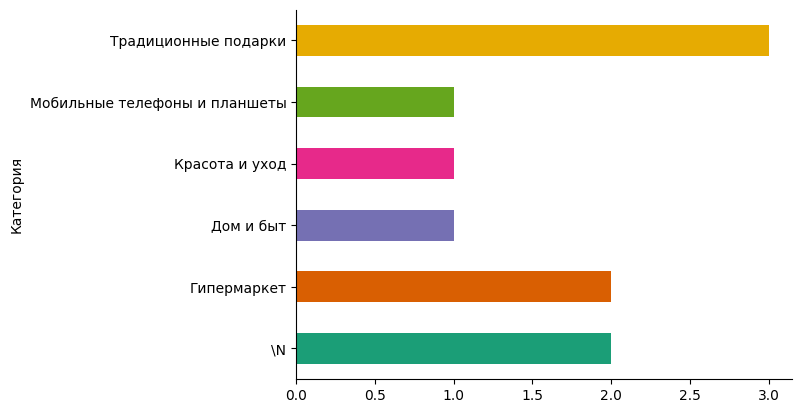

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Категория').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)